Hello! My name is David. I'm going to help manage your finances.
How can I help you today? 
 1. I want to enter recent a transaction.
 2. I want to look up transaction history.
 3. I want a financial report.
 q. Quit the program.
Please enter your option number:
3
Enter the first day you want to look up the financial report:
080117
Enter the last day you want to look up the financial report:
091517


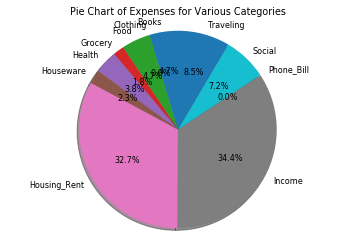

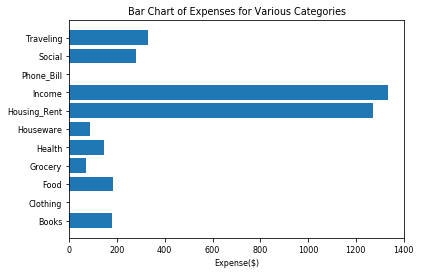

Enter '3' to look up another financial report.
Enter 'm' to go back to Main page.
Enter 'q' to quit the program
m
 1. I want to enter recent a transaction.
 2. I want to look up transaction history.
 3. I want a financial report.
 q. Quit the program.
Please enter your option number:
2
Enter the first day you want to look up transaction history:
090117
Enter the last day you want to look up transaction history:
093017
Enter the minimum amount of money you want to look up your transaction history:
15
Enter the maximum amount of money you want to look up your transaction history:
100
Here are your recent transactions:
080417 42.000000 Books
080417 15.130000 Food
080517 62.420000 Social
080517 17.000000 Food
080517 22.000000 Traveling
080717 33.610000 Traveling
080817 55.570000 Traveling
081217 17.220000 Food
080517 20.000000 Food
080617 35.000000 Traveling
080617 70.000000 Traveling
080617 89.000000 Traveling
081417 30.000000 Grocery
081417 20.710000 Social
081717 19.980000 Social
081817

In [ ]:
import os, csv
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 8}); # set the font size of pie chart and bar chart to be size 22

# important category names
CATEGORY = ["Income","Food", "Housing_Rent", "Books", "Social", "Houseware", "Health", "Grocery", "Phone_Bill", "Clothing", "Traveling"];
CATEGORY.sort();
# functions

def mainPageInstruction():
    # mainPageInstruction function gives users the instruction of using this program
    # it provides three main options: record a transaction, look up transactions, and provide analysis report
    option = input(" 1. I want to enter recent a transaction.\n 2. I want to look up transaction history.\n 3. I want a financial report.\n q. Quit the program.\nPlease enter your option number:\n");
    return option;

def invalidOption():
    # invalidOption function gives users a prompt to enter a proper option again
    option = input("The option you entered is not valid. Please enter a valid option.\n")
    return option;

def enterTransaction():
    # enterTransaction function allows one to enter the date, amount, and category of a purchase
    # this data will be stored under a csv file, which can be retrieved for future analysis
    
    date = input("Enter your transaction date. Format it as 031417 for March 14, 2017\n");
    #print ("the date is %s ." % date);
    expense = input("Enter the amount you spent or received:\n");
    expense = float(expense);
    print ("Pick the category of this transaction:");
    for i in range(len(CATEGORY)):
        print ("%d. %s" %(i, CATEGORY[i]));
    catInd = input("");
    catInd = int(catInd);

    fName = 'transactionHistory.csv';
    if os.path.isfile(fName):
        fLink = open(fName,'a');
        fLink.write("%s %f %s\n" % (date, expense, CATEGORY[catInd]));
        fLink.close();
    else:
        fLink = open(fName,'w');
        fLink.write("%s %f %s\n" % (date, expense, CATEGORY[catInd]));
        fLink.close();
    print("Your transaction has been successfully recorded!");
    exitOption = input("Enter '1' to enter another transaction.\nEnter 'm' to go back to Main page.\nEnter 'q' to quit the program\n")
    return exitOption;

def lookUpTransaction():
    # lokUpTransaction allows users to see what transactions were done in history
    # users are able to specify what time period, money range, and categories to look up
    
    date1 = input("Enter the first day you want to look up transaction history:\n");
    date2 = input("Enter the last day you want to look up transaction history:\n");
    startDate = int(date1[4:6] + date1[2:4] + date1[0:2]);
    endDate = int(date2[4:6] + date2[2:4] + date2[0:2]);

    price1 = input("Enter the minimum amount of money you want to look up your transaction history:\n");
    price2 = input("Enter the maximum amount of money you want to look up your transaction history:\n");
    startPrice = float(price1);
    endPrice = float(price2);

##    category = input("Enter the category you want to look up your transaction history:\n");
##    for i in range(len(CATEGORY)):
##        print ("%d. %s" %(i, CATEGORY[i]));
##    catInd = input("");
##    catInd = int(catInd);
    
    with open('transactionHistory.csv') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=' ');
        print("Here are your recent transactions:");
        for row in readCSV:
            date = row[0];
            date = int(date[4:6] + date[2:4] + date[0:2]);
            price = row[1];
            price = float(price);
            
            if(startDate <= date <= endDate):
                if(startPrice <= price <= endPrice):
                    print(row[0], row[1], row[2]);

        print("\n");
        
    exitOption = input("Enter '2' to look up another transaction.\nEnter 'm' to go back to Main page.\nEnter 'q' to quit the program\n")
    return exitOption;

def reportTransaction():
    # reportTransaction allows users to see the categories and percentages of expenses visually,
    # including bar chart and pie chart
    # users can specify the start date and end date they want to look at the report

    date1 = input("Enter the first day you want to look up the financial report:\n");
    date2 = input("Enter the last day you want to look up the financial report:\n");
    startDate = int(date1[4:6] + date1[2:4] + date1[0:2]);
    endDate = int(date2[4:6] + date2[2:4] + date2[0:2]);

    catExpenSum = [.01]*len(CATEGORY); # expense sum of different category
    with open('transactionHistory.csv') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=' ');
        
        
        for row in readCSV:
            date = row[0];
            date = int(date[4:6] + date[2:4] + date[0:2]);

            if(startDate <= date <= endDate):
                price = row[1];
                price = float(price);
                category = row[2];
                catInd = CATEGORY.index(category);
                catExpenSum[catInd] += price;
                
    # make a pie chart
    fig1, ax1 = plt.subplots();
    ax1.pie(catExpenSum, labels=CATEGORY, autopct='%1.1f%%', shadow=True, startangle=90);
    ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Pie Chart of Expenses for Various Categories');

    # make a bar chart
    fig2, ax2 = plt.subplots();
    x_pos = np.arange(len(CATEGORY));
    #ax2.bar(x_pos, catExpenSum, align='center', alpha = .5);
    ax2.barh(x_pos, catExpenSum);
    ax2.set_yticks(x_pos);
    ax2.set_yticklabels(CATEGORY);
    ax2.set_xlabel('Expense($)');
    ax2.set_title('Bar Chart of Expenses for Various Categories');
    plt.show();
    
    exitOption = input("Enter '3' to look up another financial report.\nEnter 'm' to go back to Main page.\nEnter 'q' to quit the program\n")
    return exitOption;    
    
# main program
print ("Hello! My name is David. I'm going to help manage your finances.\nHow can I help you today? ")
option = mainPageInstruction();

while(option != 'q'):
    if(option == '1'):
        option = enterTransaction();
    elif(option == '2'):
        option = lookUpTransaction();
    elif(option == '3'):
        option = reportTransaction();
    elif(option == 'm'):
        option = mainPageInstruction();
    else:
        option = invalidOption();
print ("You have quit the Finance Analyzer. Have a great day!");
